In [21]:
pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.


In [22]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [23]:
data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
local_file = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/horse-or-human')

data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
local_file = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/validation-horse-or-human')
zip_ref.close()

In [68]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # DO NOT CHANGE
])   


In [71]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.0001),
    metrics=['accuracy']
)

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [73]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[checkpoint]
)

Epoch 1/50


c:\Users\userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.5331 - loss: 0.6835
Epoch 1: val_accuracy improved from -inf to 0.53125, saving model to best_model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 279ms/step - accuracy: 0.5340 - loss: 0.6833 - val_accuracy: 0.5312 - val_loss: 0.6270
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.7188 - loss: 0.6054
Epoch 2: val_accuracy improved from 0.53125 to 0.85938, saving model to best_model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - accuracy: 0.7200 - loss: 0.6040 - val_accuracy: 0.8594 - val_loss: 0.3471
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8485 - loss: 0.4003
Epoch 3: val_accuracy did not improve from 0.85938
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.8483 - loss: 0.3997 - val_accuracy: 0.7812 - val_loss: 0.7024
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8185 - loss: 0.4668
Epoch 4: val_accuracy did not improve from 0.85938
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 277ms

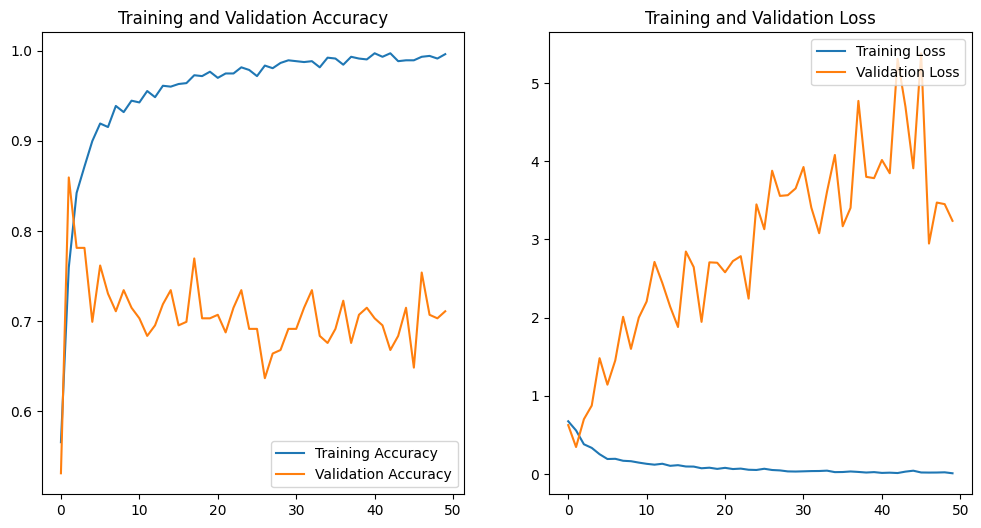

In [74]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [76]:
model = tf.keras.models.load_model('best_model.keras')

# Evaluate best_val_acc_model
loss_best, acc_best = model.evaluate(validation_generator)
print(f"Validation Accuracy (best_val_acc_model): {acc_best * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8374 - loss: 0.3599
Validation Accuracy (best_val_acc_model): 85.94%
